# MSE-468: Lab 4 Notebook

## Convergence tests

### Timestep

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import os

dt = np.linspace(0.0001, 0.002, 15)
#print(dt)
delta_E = []
fluctuations = []
# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'convergence/partA'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    E = []
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        data = np.loadtxt(file_path)
        E.append(data[:,2] + data[:,3])
        E = np.asarray(E)
        mean_E = np.mean(E)
        fluctuation = E - mean_E
        fluctuations.append(np.sqrt(np.mean(fluctuation**2)))
        #skip the empty files
        if data.size == 0:
            continue
        #print("Processing :", os.path.basename(file_path))
        E_in = data[0,2] + data[0,3]
        E_f = data[-1,2] + data[-1,3]
        delta_E.append(np.abs(E_in-E_f)/np.abs(E_in)*100)
fluctuations = fluctuations[7:]
print(fluctuations)

[0.001471790710462992, 0.001855198282059668, 0.0019178792107915606, 0.002537987161601773, 0.0035379373671868383, 0.003252956869487519, 0.004440085623893604, 0.0050546273003556795]


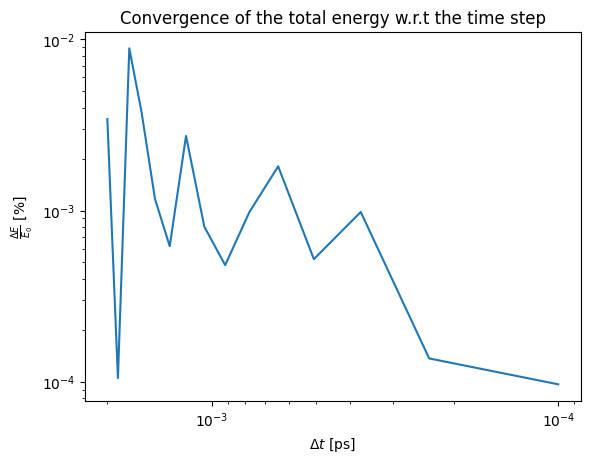

In [90]:
plt.figure()
plt.plot(dt,delta_E)
plt.semilogx()
plt.semilogy()
plt.xlabel('$\Delta t$ [ps]')
plt.ylabel(r'$\frac{\Delta E}{E_{0}}$ [%]')
plt.title('Convergence of the total energy w.r.t the time step')
plt.gca().invert_xaxis()
plt.show()

In [101]:
from scipy.optimize import curve_fit
def f(x, a, b):
    return a*x+b
popt, pcov = curve_fit(f, np.log(dt[7:]), np.log(fluctuations))
print(popt)

[1.93223057 6.68360486]


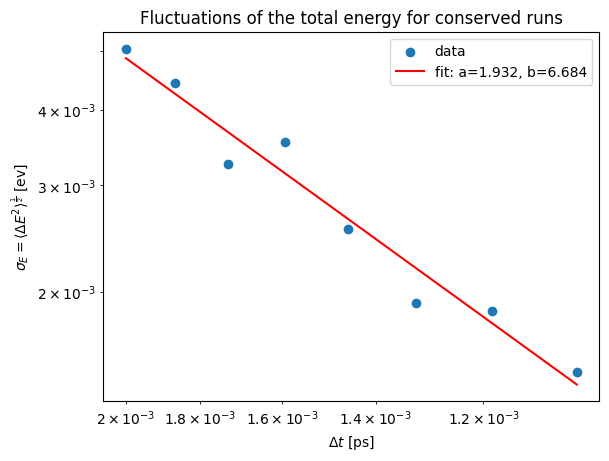

In [111]:
plt.figure()
plt.scatter(dt[7:],fluctuations, label='data')
plt.plot(dt[7:],np.exp(f(np.log(dt[7:]), *popt)),color = 'red', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.semilogx()
plt.semilogy()
plt.xlabel('$\Delta t$ [ps]')
plt.ylabel(r'$\sigma_{E}=\langle \Delta E ^2\rangle^{\frac{1}{2}}$ [ev]')
plt.title('Fluctuations of the total energy for conserved runs')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Supercell

#### T  = 1000K

In [130]:
threshold = 5

cell = np.array([2,3,4,5])
target_temp = 1000
temp_fluc = []

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'convergence/partB'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        data = np.loadtxt(file_path)
        temp = data[:,1]
        temp_fluc.append(100*np.std(temp)/target_temp)

In [170]:
def g(x, a,b):
    return a*x+b

[-1.56639552  3.41635836]


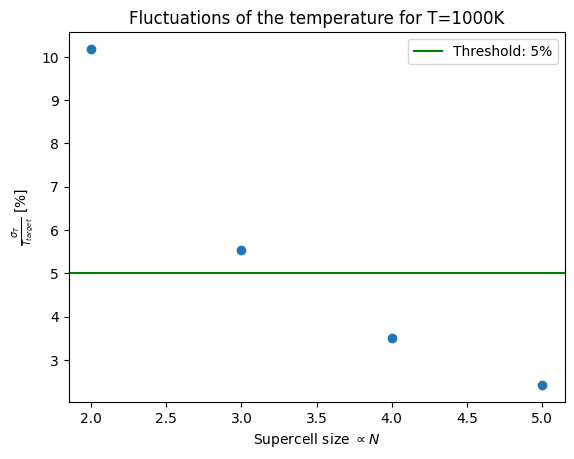

In [177]:
plt.figure()
plt.scatter(cell,temp_fluc)
plt.axhline(y=threshold, color='green', label='Threshold: 5%')
plt.xlabel(r'Supercell size $\propto N $')
plt.ylabel(r'$\frac{\sigma_{T}}{T_{target}}$ [%]')
plt.title('Fluctuations of the temperature for T=1000K')
plt.legend()
plt.show()

In [178]:
temp_fluc = np.asarray(temp_fluc)
temp_fluc = (temp_fluc/100*target_temp)**2
atoms = cell**3*4
popt, pcov = curve_fit(g, np.log(atoms), np.log(temp_fluc))
print(popt)

[-1.04426368 12.88554375]


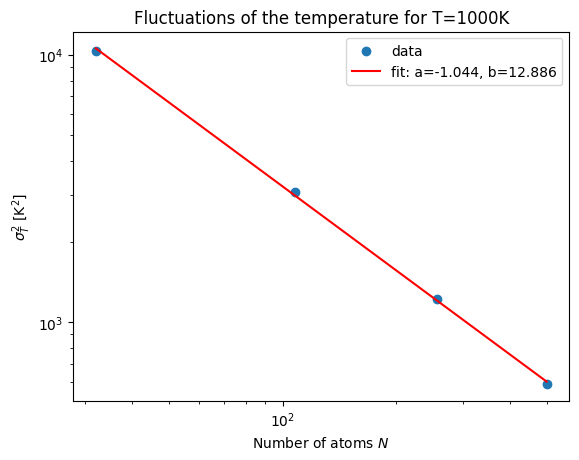

In [180]:
plt.figure()
plt.scatter(atoms,temp_fluc, label='data')
plt.plot(atoms,np.exp(g(np.log(atoms), *popt)),color = 'red', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.semilogx()
plt.semilogy()
plt.xlabel(r'Number of atoms $N$')
plt.ylabel(r'$\sigma_{T}^2$ [K$^2$]')
plt.title('Fluctuations of the temperature for T=1000K')
plt.legend()
plt.show()

#### T = 3000K

In [204]:
threshold = 5

cell = np.array([2,3,4,5])
target_temp_2 = 3000
temp_fluc_2 = []

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'convergence/partB/3000K'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        data = np.loadtxt(file_path)
        temp = data[:,1]
        temp_fluc_2.append(100*np.std(temp)/target_temp_2)

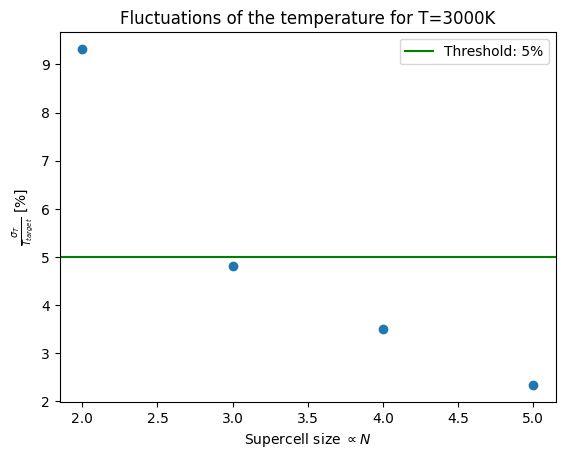

In [205]:
plt.figure()
plt.scatter(cell,temp_fluc_2)
plt.axhline(y=threshold, color='green', label='Threshold: 5%')
plt.xlabel(r'Supercell size $\propto N $')
plt.ylabel(r'$\frac{\sigma_{T}}{T_{target}}$ [%]')
plt.title('Fluctuations of the temperature for T=3000K')
plt.legend()
plt.show()

In [206]:
temp_fluc_2 = np.asarray(temp_fluc_2)
temp_fluc_2 = (temp_fluc_2/100*target_temp_2)**2
atoms = cell**3*4
popt, pcov = curve_fit(g, np.log(atoms), np.log(temp_fluc_2))
print(popt)

[-0.98076093 14.63772983]


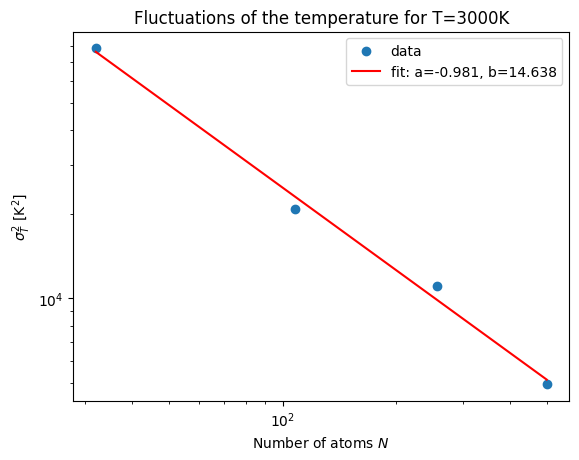

In [207]:
plt.figure()
plt.scatter(atoms,temp_fluc_2, label='data')
plt.plot(atoms,np.exp(g(np.log(atoms), *popt)),color = 'red', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.semilogx()
plt.semilogy()
plt.xlabel(r'Number of atoms $N$')
plt.ylabel(r'$\sigma_{T}^2$ [K$^2$]')
plt.title('Fluctuations of the temperature for T=3000K')
plt.legend()
plt.show()

#### Production time

In [181]:
vaf = np.loadtxt('convergence/partC/vaf.dat')

In [189]:
# sliding std
def sliding_std(x, window_size):
    std = []
    for i in range(len(x)-window_size):
        std.append(np.std(x[i:i+window_size]))
    return std

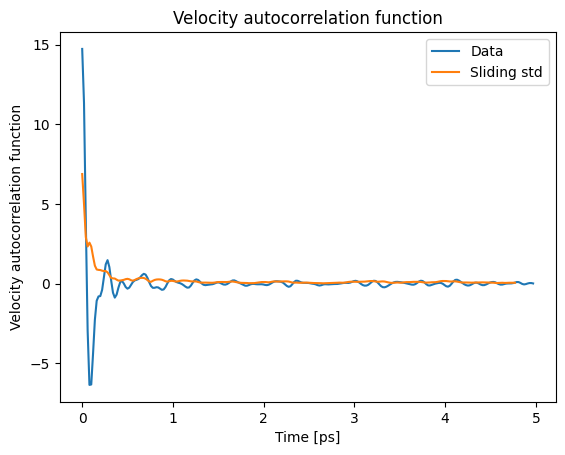

In [190]:
plt.figure()
plt.plot(vaf[:,0],vaf[:,1],label = 'Data')
plt.plot(vaf[:,0][:-10],sliding_std(vaf[:,1],10),label = 'Sliding std')
plt.xlabel('Time [ps]')
plt.ylabel('Velocity autocorrelation function')
plt.title('Velocity autocorrelation function')
plt.legend()
plt.show()

In [203]:
print(vaf[0,1])
ekin = np.loadtxt('convergence/partC/E_of_t_4_1000_0.001.dat')
print(np.mean(ekin[:,3]))
print(np.mean(ekin[0,3])/vaf[0,1])

14.738427
34.39792869229153
2.2265584024381844


## Melting of bulk nickel

### A - Caloric curve

In [221]:
# system size chosen: 4x4x4
# timestep chosen: 0.001
# production time: 15ps
# equilibration time: 3ps
# sampling frequency: 0.02ps

temperatures = np.linspace(1000,3000,21)
temp_raff = np.array([1820,1840,1860,1880])
E_pot = []
E_pot_raff = []

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'p2'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        if "1820" in file_path or "1840" in file_path or "1860" in file_path or "1880" in file_path:
            data = np.loadtxt(file_path)
            pot = data[:,2]/256
            E_pot_raff.append(np.mean(pot))
        else:
            data = np.loadtxt(file_path)
            pot = data[:,2]/256
            E_pot.append(np.mean(pot))

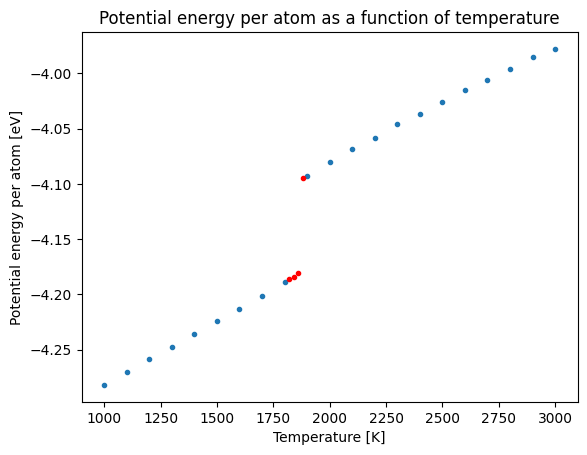

In [222]:
plt.figure()
plt.scatter(temperatures,E_pot,marker = '.')
plt.scatter(temp_raff,E_pot_raff,marker = '.',color = 'red')
plt.xlabel('Temperature [K]')
plt.ylabel('Potential energy per atom [eV]')
plt.title('Potential energy per atom as a function of temperature')
plt.show()

So the melting temperature is between 1860 K and 1880 K -> $1870 \pm 10 K$.

In [385]:
E_tot = []
E_tot_raff = []
E_tot2 = []
E_tot_raff2 = []
pressure = []
pressure_raff = []

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'p2'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        if "1820" in file_path or "1840" in file_path or "1860" in file_path or "1880" in file_path:
            data = np.loadtxt(file_path)
            tot = data[:,3] + data[:,2]
            E_tot_raff.append(np.mean(tot))
            E_tot_raff2.append(np.mean(tot**2))
            p = np.mean(data[:,4])
            pressure_raff.append(p)
        else:
            data = np.loadtxt(file_path)
            tot = data[:,3] + data[:,2]
            E_tot.append(np.mean(tot))
            E_tot2.append(np.mean(tot**2))
            p = np.mean(data[:,4])
            pressure.append(p)
print(E_tot_raff)
print(E_tot_raff2)

[-1011.644994776551, -1010.6153415835478, -1008.9553315082584, -986.3186520190186]
[1023443.3354401831, 1021363.0320875063, 1018011.8997836735, 972844.6717508014]


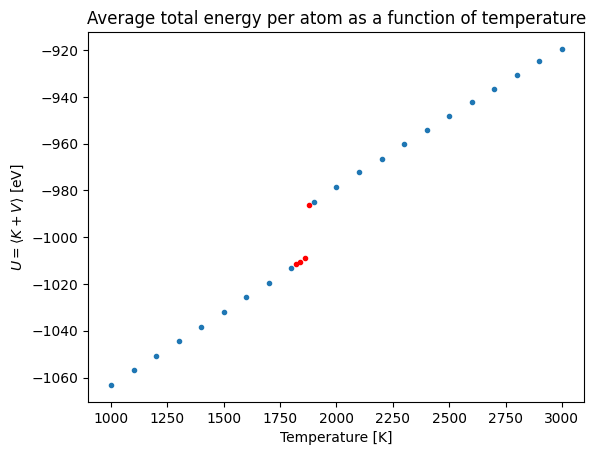

In [280]:
plt.figure()
plt.scatter(temperatures,E_tot,marker = '.')
plt.scatter(temp_raff,E_tot_raff,marker = '.',color = 'red')
plt.xlabel('Temperature [K]')
plt.ylabel(r'$U = \langle K+V\rangle $ [eV]')
plt.title('Average total energy per atom as a function of temperature')
plt.show()

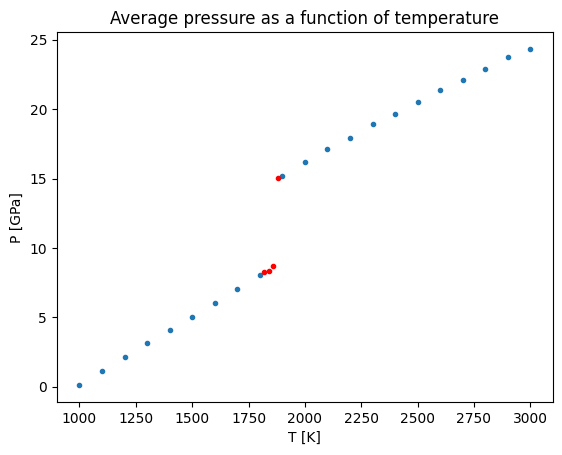

In [271]:
plt.figure()
plt.scatter(temperatures,pressure,marker = '.')
plt.scatter(temp_raff,pressure_raff,marker = '.',color = 'red')
plt.xlabel('T [K]')
plt.ylabel('P [GPa]')
plt.title('Average pressure as a function of temperature')
plt.show()

#### Heat capacity - first method

In [410]:
avg_energy_fluc = []
avg_energy_fluc_raff = []
eV = 1.602176634e-19 # in J

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'p2'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        if "1820" in file_path or "1840" in file_path or "1860" in file_path or "1880" in file_path:
            data = np.loadtxt(file_path)
            tot = data[:,3] + data[:,2]
            std = np.var(tot)
            #std = np.std(E_tot_raff)**2
            avg_energy_fluc_raff.append(std)
        else:
            data = np.loadtxt(file_path)
            tot = data[:,3] + data[:,2]
            std = np.var(tot)
            #std = np.std(E_tot)**2
            avg_energy_fluc.append(std)


In [413]:
kb = 1.380649e-23 # in J/K
Na = 6.02214076e23
eV = 1.602176634e-19 # in J
print(avg_energy_fluc)
heat_capacity1 = np.asarray(avg_energy_fluc)/kb/(temperatures**2)*Na/256*eV**2
heat_capacity_raff = np.asarray(avg_energy_fluc_raff)/kb/(temp_raff**2)*Na/256*eV**2

[5.856109974864815, 6.224013516849249, 7.396570462298519, 8.819646197498011, 10.578046811237865, 12.855823474771833, 13.347297010025121, 16.074166995373684, 17.750976661475995, 19.039198567934918, 21.3875992285837, 22.923305129379624, 25.02942896907535, 26.702161483436317, 28.58236992755752, 32.036608191583575, 34.28865489038666, 37.850793468585366, 37.60326970029848, 43.4566745787964, 46.06627478140605]


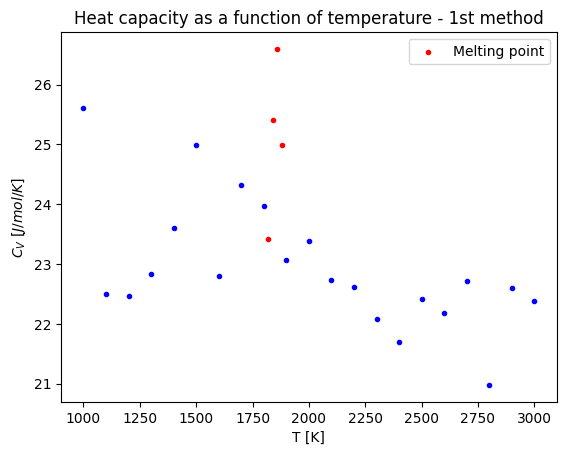

In [427]:
plt.figure()
plt.scatter(temperatures,heat_capacity1,marker = '.',color = 'blue')
plt.scatter(temp_raff,heat_capacity_raff,marker = '.',color = 'red', label = 'Melting point')
plt.xlabel('T [K]')
plt.ylabel(r'$C_V$ [$J/mol/K$]')
plt.title('Heat capacity as a function of temperature - 1st method')
plt.legend()
plt.show()

Method 2

In [328]:
# Get the current working directory
current_directory = os.getcwd()
U = []
U_raff = []
# Specify the relative path to the directory where your .dat files are located
relative_directory_path = 'p2'

# Create the full directory path by joining the current directory and the relative path
directory_path = os.path.join(current_directory, relative_directory_path)

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat'):  # Check if the file has the .dat extension
        file_path = os.path.join(directory_path, filename)  # Create the full file path
        # Process the file (replace print statement with your desired code)
        if "1820" in file_path or "1840" in file_path or "1860" in file_path or "1880" in file_path:
            data = np.loadtxt(file_path)
            tot = np.mean(data[:,3] + data[:,2])
            U_raff.append(tot)

        else:
            data = np.loadtxt(file_path)
            tot = np.mean(data[:,3] + data[:,2])
            U.append(tot)


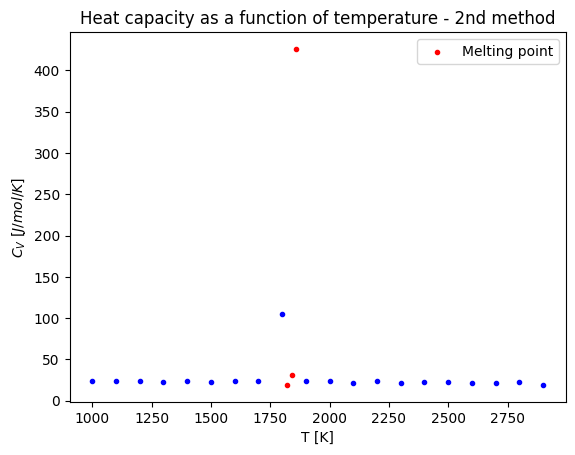

In [426]:
delta_T = 100#np.ones(len(temperatures)-1)*100
delta_T_raff = 20#np.ones(len(temp_raff)-1)*20
heat_capacity2 = []
heat_capacity2_raff = []
for i in range(len(U)-1):
    heat_capacity2.append((U[i+1]-U[i])/delta_T*1.6e-19*Na/256)
for i in range(len(U_raff)-1):
    heat_capacity2_raff.append((U_raff[i+1]-U_raff[i])/delta_T_raff*1.6e-19*Na/256)

plt.figure()
plt.scatter(temperatures[:-1],heat_capacity2,marker = '.',color = 'blue')
plt.scatter(temp_raff[:-1],heat_capacity2_raff,marker = '.',color = 'red', label = 'Melting point')
plt.xlabel('T [K]')
plt.ylabel(r'$C_V$ [$J/mol/K$]')
plt.title('Heat capacity as a function of temperature - 2nd method')
plt.legend()
plt.show()

#### RDF

In [352]:
rdf_1000= np.loadtxt('rdf/RDF_1000.dat')
rdf_1860= np.loadtxt('rdf/RDF_1860.dat')
rdf_1880= np.loadtxt('rdf/RDF_1880.dat')
rdf_3000= np.loadtxt('rdf/RDF_3000.dat')

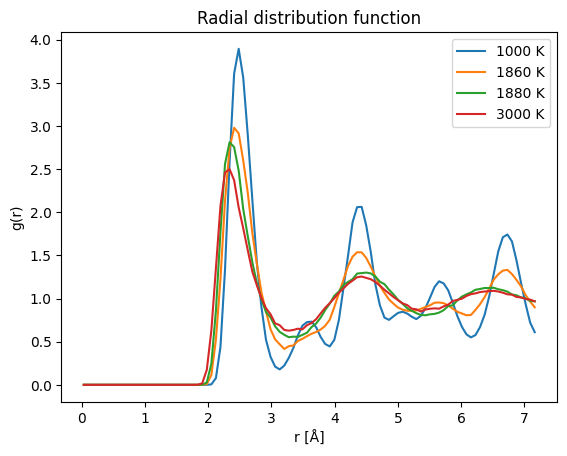

In [354]:
plt.figure()
plt.plot(rdf_1000[:,0],rdf_1000[:,1],label = '1000 K')
plt.plot(rdf_1860[:,0],rdf_1860[:,1],label = '1860 K')
plt.plot(rdf_1880[:,0],rdf_1880[:,1],label = '1880 K')
plt.plot(rdf_3000[:,0],rdf_3000[:,1],label = '3000 K')
plt.xlabel('r [Å]')
plt.ylabel('g(r)')
plt.title('Radial distribution function')
plt.legend()
plt.show()

#### Diffusion

In [360]:
diff_1000 = np.loadtxt('rdf/msd_1000.dat')
diff_3000 = np.loadtxt('rdf/msd_3000.dat')

Text(0.5, 1.0, 'Mean square displacement - 1000K')

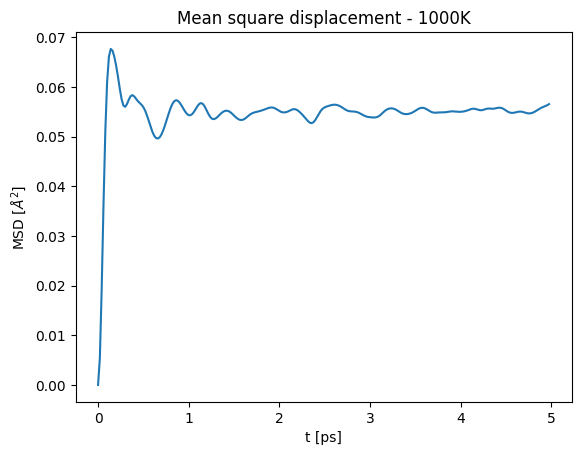

In [367]:
plt.figure()
plt.plot(diff_1000[:,0],diff_1000[:,1])
plt.xlabel('t [ps]')
plt.ylabel('MSD [$Å^2$]')
plt.title('Mean square displacement - 1000K')

Text(0.5, 1.0, 'Mean square displacement - 3000K')

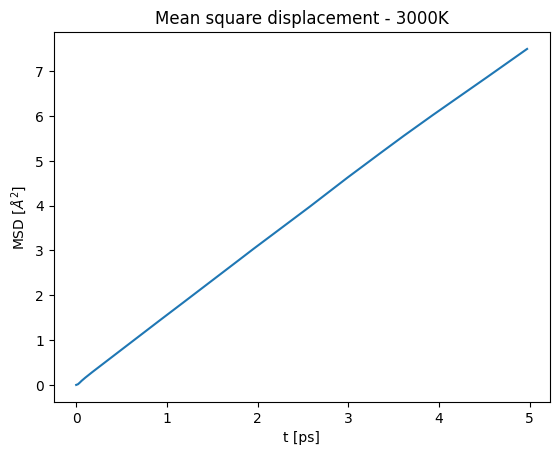

In [369]:
plt.figure()
plt.plot(diff_3000[:,0],diff_3000[:,1])
plt.xlabel('t [ps]')
plt.ylabel('MSD [$Å^2$]')
plt.title('Mean square displacement - 3000K')

In [363]:
d1000 = 1/6*np.mean(diff_1000[50:,2]) #from 1ps
d3000 = 1/6*np.mean(diff_3000[15:,2]) #from 0.2ps

print('Diffusion coefficient at 1000K: ',d1000)
print('Diffusion coefficient at 3000K: ',d3000)

Diffusion coefficient at 1000K:  9.13633333333333e-05
Diffusion coefficient at 3000K:  0.25037823475177307


#### Bonus 2

In [ ]:
a = np.array([3.4,3.5,3.6,3.7])
vol = (a*3)**3